# Pandas 2

## Entradas y salidas
En general los datos que se analizan no provienen de el teclado o de pequeñas listas. En lugar de esto lo que tendremos son datos generados por programas (experimentos, encuestas ,...) que probablemente están guardados en un archivo (normalmente un archivo de texto separado por comas o CSV por sus siglas en inglés). Luego es necesario poder leer e interpretar archivos de este tipo. Pandas cuenta con varias funciones especializadas en éste problema.

### `read_csv()`

__Sintaxis:__

>```
>   pandas.read_csv(PathToFile, sep=',', delimiter=None, header='infer', names=None, index_col=None, usecols=None)

>```

- __PathToFile:__ Camino al archivo.
- __sep :__ Tipo de separador de los datos (en este caso son comas por defecto).
- __delimiter: __ igual que sep.
- __header: __ Número de filas que se van a usar como nombres de las columnas, por defecto 0, la primera.
- __names: __ Arreglo con los nombres de las columnas (opcional), si se usa, se debe usar `header=0`.
- __index_col: __ Columnas para usar como etiquetas de las filas, por defecto `None`. 
- __usecols: __ Devuelve un subconjunto de las columnas. Si es similar a una lista, todos los elementos deben ser posicionales (es decir, índices enteros en las columnas del documento) o cadenas que correspondan a los nombres de columna proporcionados por el usuario en los nombres o inferidos de la(s) fila(s) del encabezado del documento.


Sintaxis completa en la documentación https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html

__Ejemplo:__ Usando el archivo 100 `Sales Records.csv` que se descarga de http://eforexcel.com/wp/downloads-18-sample-csv-files-data-sets-for-testing-sales/, Cargemos el archivo y mostremos sus primeras lineas

In [1]:
#Para saber si el archivo existe
import pathlib
import zipfile
#Para descargar el archivo
import urllib.request as URL

FILES= "100 Sales Records.csv", "5000 Sales Records.csv"

FILES= "100 Sales Records.csv", "5000 Sales Records.csv"
files = {
FILES[0] : pathlib.Path(FILES[0]),
FILES[1] :pathlib.Path(FILES[1])
}

for key, path in files.items():
    if path.exists ():
        print ("File ",key, "exist")
    else:
        print ("File ", key," not exist \n Downloading ...")
        name = key.replace(" ","-").replace("csv","zip")
        URL.urlretrieve('http://eforexcel.com/wp/wp-content/uploads/2017/07/'+name,name)
        print("Unziping the file: ",name)
        #Extraigo los archivos .zip
        
        with zipfile.ZipFile(name, 'r') as zip_ref:
            zip_ref.extractall()

File  100 Sales Records.csv  not exist 
Unziping the file:  100-Sales-Records.zip
File  5000 Sales Records.csv  not exist 
Unziping the file:  5000-Sales-Records.zip


In [2]:
import pandas as pd
#Se carga el archivo usando todos los valores por defecto
SaleRecord_DF=pd.read_csv("100 Sales Records.csv")
#Muestro las primeros 5 lineas sin necesidad de usar el print (esto algunas veces no funciona bien)
SaleRecord_DF.head(5)

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


In [3]:
#Para liberar espacio en ram
del(SaleRecord_DF)
#Ahora voy a usar el "Order ID" para que sea el label de las filas
import pandas as pd
#Se carga el archivo y se le indica que las etiquetas de las filas sea el contenido de la columna 'Order ID'
SaleRecord_DF_ID=pd.read_csv("100 Sales Records.csv",index_col=['Order ID'])
#Muestro las primeros 5 lineas
SaleRecord_DF_ID.head(5)

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
Order ID,,,,,,,,,,,,,
669165933,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
963881480,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
341417157,Europe,Russia,Office Supplies,Offline,L,5/2/2014,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
514321792,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
115456712,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


In [4]:
#Borro el objeto
del(SaleRecord_DF_ID)
#Importo pandas (no es nesesario pues antes se llamo)
import pandas as pd
#Como el archivo está en inglés, cambiemos los nombres de las columnas
Columnas=['Región','Pais','Tipo de Item','Canal de Ventas','Prioridad de Orden','Fecha de Orden','ID Orden','Fecha Envío','Unidades Vendidas','Precio Unitario','Costo Unitario','Ingreso Total', 'Costo Total','Ganancia Total']
#Se carga el archivo usando Columnas para nombrar las columnas
SaleRecord_DF_Esp=pd.read_csv("100 Sales Records.csv",names=Columnas,header=0,index_col=['ID Orden'])
#Muestro las primeros 5 lineas
SaleRecord_DF_Esp.head(5)

,Región,Pais,Tipo de Item,Canal de Ventas,Prioridad de Orden,Fecha de Orden,Fecha Envío,Unidades Vendidas,Precio Unitario,Costo Unitario,Ingreso Total,Costo Total,Ganancia Total
ID Orden,,,,,,,,,,,,,
669165933,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
963881480,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
341417157,Europe,Russia,Office Supplies,Offline,L,5/2/2014,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
514321792,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
115456712,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


In [5]:
#Borro el objeto
del(SaleRecord_DF_Esp)

### Convertir a tipos de datos
`dtype` es un argumento de `read_csv` que se usa para asignar un tipo de datos espesífico a las columnas y se pasar como dict.

__Sintaxis:__

>```
>   dtype={'NombreColumna': DataType}
>```

__Ejemplo:__ Aseguremos que Unidades Vendidas tenga al tipo de datos correcto.

In [6]:
import pandas as pd
import numpy as np
#Como el archivo está en inglés, cambiemos los nombres de las columnas
Columnas=['Región','Pais','Tipo de Item','Canal de Ventas','Prioridad de Orden','Fecha de Orden','ID Orden','Fecha Envío','Unidades Vendidas','Precio Unitario','Costo Unitario','Ingreso Total', 'Costo Total','Ganancia Total']
#Se carga el archivo con el tipo de datos correcto un entero largo
SaleRecord_DF_Dates=pd.read_csv("100 Sales Records.csv",names=Columnas,header=0,index_col=['ID Orden'],dtype={'Unidades Vendidas':np.int_})
#Muestro las primeros 5 lineas de 'Unidades Vendidas'
print(SaleRecord_DF_Dates['Unidades Vendidas'].head(5))
#Borro el objeto
del(SaleRecord_DF_Dates)

ID Orden
669165933    9925
963881480    2804
341417157    1779
514321792    8102
115456712    5062
Name: Unidades Vendidas, dtype: int32


## Agrupar

En muchas situaciones, se dividen los datos en conjuntos y aplicamos algún tratamiento en cada subconjunto. Luego se pueden juntar los diferentes resultados en algo general.

### Dividir en grupos

Un objeto de Pandas se puede dividir en cualquiera de sus sub-objetos. Hay varias formas de dividir un objeto como:
- `obj.groupby('clave')`
- `obj.groupby (['clave1', 'clave2'])`
- `obj.groupby (clave, eje = 1)`

__Ejemplos:__ Para el DF de los ejemplos anteriores


In [7]:
import pandas as pd
#Se carga el archivo usando todos los valores por defecto
SaleRecord_DF=pd.read_csv("5000 Sales Records.csv")
#Agrupo por Region
SaleRecord_DF_By_Region=SaleRecord_DF.groupby('Region')
#Muestro los grupos

for key, _ in SaleRecord_DF_By_Region:
    print(key)
    #print(group)

Asia
Australia and Oceania
Central America and the Caribbean
Europe
Middle East and North Africa
North America
Sub-Saharan Africa


In [8]:
#ahora selecciono uno de los grupos
DF_Europa = SaleRecord_DF_By_Region.get_group('Europe')
#Cada uno de estos grupos es a su vez un DataFrame, luego puede ser vuelto a filtrar
# esta véz por pais y por canal de ventas
DF_Europa_By_Contry_And_SC=DF_Europa.groupby(['Country','Sales Channel'])
#Y miremos los diferentes paises que contiene
for key, _ in DF_Europa_By_Contry_And_SC:
    print(key)

#Para liberar espacio ram
#del(SaleRecord_DF)

('Albania', 'Offline')
('Albania', 'Online')
('Andorra', 'Offline')
('Andorra', 'Online')
('Armenia', 'Offline')
('Armenia', 'Online')
('Austria', 'Offline')
('Austria', 'Online')
('Belarus', 'Offline')
('Belarus', 'Online')
('Belgium', 'Offline')
('Belgium', 'Online')
('Bosnia and Herzegovina', 'Offline')
('Bosnia and Herzegovina', 'Online')
('Bulgaria', 'Offline')
('Bulgaria', 'Online')
('Croatia', 'Offline')
('Croatia', 'Online')
('Cyprus', 'Offline')
('Cyprus', 'Online')
('Czech Republic', 'Offline')
('Czech Republic', 'Online')
('Denmark', 'Offline')
('Denmark', 'Online')
('Estonia', 'Offline')
('Estonia', 'Online')
('Finland', 'Offline')
('Finland', 'Online')
('France', 'Offline')
('France', 'Online')
('Georgia', 'Offline')
('Georgia', 'Online')
('Germany', 'Offline')
('Germany', 'Online')
('Greece', 'Offline')
('Greece', 'Online')
('Hungary', 'Offline')
('Hungary', 'Online')
('Iceland', 'Offline')
('Iceland', 'Online')
('Ireland', 'Offline')
('Ireland', 'Online')
('Italy', 'Offl

In [9]:
#Ahora veamos solo la información de Rusia y ventas online
DF_Europa_By_Contry_And_SC.get_group(('Russia', 'Online'))

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
79,Europe,Russia,Household,Online,M,7/10/2017,194176757,8/20/2017,72,668.27,502.54,48115.44,36182.88,11932.56
312,Europe,Russia,Personal Care,Online,L,4/24/2015,602357041,5/5/2015,9689,81.73,56.67,791881.97,549075.63,242806.34
1925,Europe,Russia,Household,Online,H,4/3/2017,549058330,5/11/2017,7416,668.27,502.54,4955890.32,3726836.64,1229053.68
2558,Europe,Russia,Beverages,Online,M,10/10/2013,797202146,11/17/2013,8685,47.45,31.79,412103.25,276096.15,136007.10
2562,Europe,Russia,Cosmetics,Online,L,10/29/2010,113524663,12/9/2010,3325,437.20,263.33,1453690.00,875572.25,578117.75
2618,Europe,Russia,Snacks,Online,M,9/18/2016,949388539,9/30/2016,4021,152.58,97.44,613524.18,391806.24,221717.94
3590,Europe,Russia,Personal Care,Online,M,9/14/2014,371814954,10/8/2014,7162,81.73,56.67,585350.26,405870.54,179479.72
3659,Europe,Russia,Meat,Online,M,12/20/2010,609952628,1/31/2011,7392,421.89,364.69,3118610.88,2695788.48,422822.40
3751,Europe,Russia,Office Supplies,Online,C,12/16/2010,253211104,12/27/2010,9648,651.21,524.96,6282874.08,5064814.08,1218060.00
3934,Europe,Russia,Snacks,Online,M,1/5/2013,941933286,2/8/2013,7846,152.58,97.44,1197142.68,764514.24,432628.44


## Agregaciones
Son funciones que entregan un valor por cada grupo. 

__Ejemplo:__ Usando el ejemplo anterior calculemos la media por pais y canal de venta

In [10]:
#Usamos la media de numpy
# claramente la media de los ID no tiene sentido
DF_Europa_By_Contry_And_SC.agg(np.mean)

Order ID   Units Sold  Unit Price  \
Country        Sales Channel                                          
Albania        Offline        5.708799e+08  4899.000000  309.790909   
               Online         5.971664e+08  3671.900000  367.828000   
Andorra        Offline        6.121608e+08  4169.333333  177.825556   
               Online         4.691629e+08  5029.000000  298.790455   
Armenia        Offline        6.002952e+08  5177.500000  314.398125   
...                                    ...          ...         ...   
Ukraine        Online         5.584479e+08  5369.062500  303.779375   
United Kingdom Offline        4.670584e+08  6114.571429  197.742857   
               Online         5.335674e+08  4561.187500  270.161250   
Vatican City   Offline        4.725662e+08  4205.187500  209.236875   
               Online         4.160842e+08  4545.428571  288.417143   

                               Unit Cost  Total Revenue    Total Cost  \
Country        Sales Channel                                            
Albania        Offline        201.384545   1.647727e+06  1.033278e+06   
               Online         276.662000   1.409986e+06  1.036808e+06   
Andorra        Offline        117.445000   7.966108e+05  5.474835e+05   
               Online         209.567727   1.518986e+06  1.022362e+06   
Armenia        Offline        236.651250   1.662284e+06  1.276552e+06   
...                                  ...            ...           ...   
Ukraine        Online         202.921875   1.710190e+06  1.169998e+06   
United Kingdom Offline        123.287143   1.042419e+06  6.554990e+05   
               Online         179.073750   1.209879e+06  7.962615e+05   
Vatican City   Offline        145.867500   9.911418e+05  7.283145e+05   
               Online         204.047143   9.175050e+05  6.019928e+05   

                               Total Profit  
Country        Sales Channel                 
Albania        Offline        614448.018182  
               Online         373177.782000  
Andorra        Offline        249127.326111  
               Online         496624.761818  
Armenia        Offline        385731.609375  
...                                     ...  
Ukraine        Online         540192.216250  
United Kingdom Offline        386919.697143  
               Online         413617.145625  
Vatican City   Offline        262827.323125  
               Online         315512.177143  

[96 rows x 7 columns]

In [11]:
#Tambien se puede hacer sobre una o varias columnas solamente
# Una suma sobre el Total Profit
DF_Europa_By_Contry_And_SC.agg({'Total Profit': 'sum'})

Total Profit
Country        Sales Channel              
Albania        Offline          6758928.20
               Online           3731777.82
Andorra        Offline          4484291.87
               Online          10925744.76
Armenia        Offline          6171705.75
...                                    ...
Ukraine        Online           8643075.46
United Kingdom Offline          2708437.88
               Online           6617874.33
Vatican City   Offline          4205237.17
               Online           2208585.24

[96 rows x 1 columns]

In [12]:
#Incluso varias operaciones sobre varias columnas
# note que si uso una función externa a las de pandas, la dejo sin comillas
DF_Europa_By_Contry_And_SC.agg({'Total Profit': ['sum',np.mean], 'Total Cost': ['sum','max']})

Total Profit                  Total Cost  \
                                      sum           mean          sum   
Country        Sales Channel                                            
Albania        Offline         6758928.20  614448.018182  11366063.46   
               Online          3731777.82  373177.782000  10368084.39   
Andorra        Offline         4484291.87  249127.326111   9854702.58   
               Online         10925744.76  496624.761818  22491953.96   
Armenia        Offline         6171705.75  385731.609375  20424830.62   
...                                   ...            ...          ...   
Ukraine        Online          8643075.46  540192.216250  18719969.38   
United Kingdom Offline         2708437.88  386919.697143   4588493.15   
               Online          6617874.33  413617.145625  12740184.11   
Vatican City   Offline         4205237.17  262827.323125  11653032.22   
               Online          2208585.24  315512.177143   4213949.47   

                                          
                                     max  
Country        Sales Channel              
Albania        Offline        2756934.44  
               Online         4606524.00  
Andorra        Offline        3778095.72  
               Online         4240935.06  
Armenia        Offline        3917251.52  
...                                  ...  
Ukraine        Online         3856881.12  
United Kingdom Offline        1807497.12  
               Online         3897700.24  
Vatican City   Offline        3421156.89  
               Online         1134963.52  

[96 rows x 4 columns]

In [13]:
#Borremos objetos para ahorar memoria
del(DF_Europa_By_Contry_And_SC)
del(DF_Europa)
del(SaleRecord_DF)

## Filtrado
Una de las funciones más útiles de _pandas_ son los filtros. Cuando se aplica un filtro sobre los un DF, este devuelve un subconjunto de datos que cumplan con el filtro.

Hay varias maneras de realizar filtrados con pandas, muestro algunas maneras:

__Sintaxis:__
>```
>   #Usando el DataFrame
>   df[(df.NombreColumna <CondicionLogica>)]
>   
>   #Usando La función Query()
>   df.query(NombreColumna <CondicionLogica>)
>
>   #Usando la función loc()
>   df.loc(NombreColumna <CondicionLogica>)
>
>```

__Ejemplo:__ Miremos de DF general y apliquemos un par de filtros

In [14]:
import pandas as pd
#Se carga el archivo usando todos los valores por defecto, exepto Total Profit
SaleRecord_DF=pd.read_csv("5000 Sales Records.csv")
#Primero Filtremos solo las ventas en Panama usando función query
Panama = SaleRecord_DF.query('Country=="Panama"')
#Mostremos los primeros 5 resultados
Panama.head(5)

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
1,Central America and the Caribbean,Panama,Snacks,Offline,C,7/5/2010,301644504,7/26/2010,2167,152.58,97.44,330640.86,211152.48,119488.38
72,Central America and the Caribbean,Panama,Meat,Online,H,11/24/2011,616755998,12/3/2011,660,421.89,364.69,278447.40,240695.40,37752.00
254,Central America and the Caribbean,Panama,Baby Food,Online,H,5/19/2016,205588376,6/18/2016,7024,255.28,159.42,1793086.72,1119766.08,673320.64
618,Central America and the Caribbean,Panama,Fruits,Offline,C,11/22/2016,316596639,12/4/2016,6836,9.33,6.92,63779.88,47305.12,16474.76
719,Central America and the Caribbean,Panama,Personal Care,Online,H,10/9/2013,238396728,11/27/2013,5744,81.73,56.67,469457.12,325512.48,143944.64


In [15]:
# Recordemos que Panama tambie es un DF, luego se puede volver a usar el filtrado
# Note que usando query, si las columnas tienen espacios, debe de tener mucho cuidado con la redacción
#Ahora mostremos las ventas Offline que dieron ganancias de menos de 50000 dolares 
Panama.query('`Sales Channel` == "Offline" & `Total Profit` < 50000')

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
618,Central America and the Caribbean,Panama,Fruits,Offline,C,11/22/2016,316596639,12/4/2016,6836,9.33,6.92,63779.88,47305.12,16474.76
1806,Central America and the Caribbean,Panama,Personal Care,Offline,M,7/6/2010,983207547,7/25/2010,1817,81.73,56.67,148503.41,102969.39,45534.02


In [16]:
#Podemos hacer lo mismo, utilizando el DF
Panama[ ( Panama['Sales Channel']== "Offline" ) & (Panama['Total Profit'] < 50000 ) ]

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
618,Central America and the Caribbean,Panama,Fruits,Offline,C,11/22/2016,316596639,12/4/2016,6836,9.33,6.92,63779.88,47305.12,16474.76
1806,Central America and the Caribbean,Panama,Personal Care,Offline,M,7/6/2010,983207547,7/25/2010,1817,81.73,56.67,148503.41,102969.39,45534.02


In [17]:
#Y de manera similar con la función loc
Panama.loc[ ( Panama['Sales Channel']== "Offline" ) & (Panama['Total Profit'] < 50000 ) ]

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
618,Central America and the Caribbean,Panama,Fruits,Offline,C,11/22/2016,316596639,12/4/2016,6836,9.33,6.92,63779.88,47305.12,16474.76
1806,Central America and the Caribbean,Panama,Personal Care,Offline,M,7/6/2010,983207547,7/25/2010,1817,81.73,56.67,148503.41,102969.39,45534.02


In [18]:
#Borremos los objetos
del(Panama)
del(SaleRecord_DF)

## Datos Perdidos

Algunas veces las bases de datos estan incompletas y debido a eso los análisis pueden quedar defectuosos o los programas arrojar errores. Pandas tiene un completo set de herramientas para lidiar con esos escenarios.

__Ejemplo:__ Utilicemos el archivo Listado.csv que contiene una lista de clase


In [19]:
#Asignamos el contenido del archivo al DF Lista_Clase
Lista_Clase=pd.read_csv("Listado.csv")
Lista_Clase

,Documento,Apellido1,Apellido2,Nombre1,Nombre2
0,1000764169,BOHORQUEZ,CHACON,DIEGO,ALEJANDRO
1,1003633539,CABRA,PATINO,SANTIAGO,NaN
2,1079095013,CAICEDO,MARTINEZ,YEIMAR,NaN
3,74362675,CARDENAS,COLMENARES,MANUEL,ARAUJO
4,1000215427,CASTELLANOS,GONZALEZ,ANGIE,DANIELA
5,1152715207,CATANO,MONSALVE,JULIAN,NaN
6,1001138849,DUQUE,HOYOS,ANDRES,FELIPE
7,1000086685,DUQUE,QUINTERO,SEBASTIAN,NaN
8,1020456246,GALEANO,VAHOS,JAVIER,DARIO
9,1000188723,GIRALDO,CARDENAS,MARIANA,NaN


In [20]:
#Como puede notar hay algunas entradas con NaN, lo cual indica que no tienen valor
# Primero veamos si faltan valores con las funciones isnull() y notnull()
Lista_Clase.isnull().head()

,Documento,Apellido1,Apellido2,Nombre1,Nombre2
0,False,False,False,False,False
1,False,False,False,False,True
2,False,False,False,False,True
3,False,False,False,False,False
4,False,False,False,False,False


In [21]:
Lista_Clase.notnull().head()

,Documento,Apellido1,Apellido2,Nombre1,Nombre2
0,True,True,True,True,True
1,True,True,True,True,False
2,True,True,True,True,False
3,True,True,True,True,True
4,True,True,True,True,True


### Llenando o Limpiando los faltantes
Las opción que da pandas para tratar estos faltantes se muestran a continuación: 

___Ejemplos:___

In [22]:
# Puesto que los valores faltantes son todos segundos nombres, podríamos darles a todos el mismo 
Lista_Clase.fillna("PANDEMIO").head(10)

,Documento,Apellido1,Apellido2,Nombre1,Nombre2
0,1000764169,BOHORQUEZ,CHACON,DIEGO,ALEJANDRO
1,1003633539,CABRA,PATINO,SANTIAGO,PANDEMIO
2,1079095013,CAICEDO,MARTINEZ,YEIMAR,PANDEMIO
3,74362675,CARDENAS,COLMENARES,MANUEL,ARAUJO
4,1000215427,CASTELLANOS,GONZALEZ,ANGIE,DANIELA
5,1152715207,CATANO,MONSALVE,JULIAN,PANDEMIO
6,1001138849,DUQUE,HOYOS,ANDRES,FELIPE
7,1000086685,DUQUE,QUINTERO,SEBASTIAN,PANDEMIO
8,1020456246,GALEANO,VAHOS,JAVIER,DARIO
9,1000188723,GIRALDO,CARDENAS,MARIANA,PANDEMIO


In [23]:
#Otra manera es usar un método de llenado 'pad' llena los faltantes usando los pasados (llenado hacia adelante)
# bfill llena los faltantes usando los siguientes (llenado hacia atrás)
#Usando 'pad' y mostrando los 10 últimos valores
Lista_Clase.fillna(method='pad').tail(10)

,Documento,Apellido1,Apellido2,Nombre1,Nombre2
17,42751868,ORTIZ,VELASQUEZ,GLADIS,JESUS
18,1053790010,PENAGOS,GONZALEZ,JUAN,PABLO
19,1001685972,PEREZ,GOMEZ,MATEO,PABLO
20,1036628816,PULGARIN,ESTRADA,JUAN,DIEGO
21,1065011441,RIOS,PEREZ,KATLEEN,JOHANA
22,1044503569,RUIZ,GUERRA,JORGE,IGNACIO
23,1001813111,SALDARRIAGA,MAZO,HEYDI,DAYANA
24,1017251071,SASTOQUE,BUITRAGO,SEBASTIAN,DAYANA
25,1001477629,VARGAS,ARIAS,DANIEL,DAYANA
26,1017131637,ZAPATA,HERNANDEZ,VENANCIO,DAYANA


In [24]:
#Usando 'bfill' y mostrando los 10 últimos valores
#Note que como no hay valores luego de la entrada 26, entonces las últimas filas quedaron sin llenar
Lista_Clase.fillna(method='bfill').tail(10)

,Documento,Apellido1,Apellido2,Nombre1,Nombre2
17,42751868,ORTIZ,VELASQUEZ,GLADIS,JESUS
18,1053790010,PENAGOS,GONZALEZ,JUAN,PABLO
19,1001685972,PEREZ,GOMEZ,MATEO,DIEGO
20,1036628816,PULGARIN,ESTRADA,JUAN,DIEGO
21,1065011441,RIOS,PEREZ,KATLEEN,JOHANA
22,1044503569,RUIZ,GUERRA,JORGE,IGNACIO
23,1001813111,SALDARRIAGA,MAZO,HEYDI,DAYANA
24,1017251071,SASTOQUE,BUITRAGO,SEBASTIAN,NaN
25,1001477629,VARGAS,ARIAS,DANIEL,NaN
26,1017131637,ZAPATA,HERNANDEZ,VENANCIO,NaN


In [25]:
#En el caso de que la falta de algún valor haga el dato inválido, se puede desechar dicho dato
# para eso se usa dropna()
Lista_Clase.dropna()

,Documento,Apellido1,Apellido2,Nombre1,Nombre2
0,1000764169,BOHORQUEZ,CHACON,DIEGO,ALEJANDRO
3,74362675,CARDENAS,COLMENARES,MANUEL,ARAUJO
4,1000215427,CASTELLANOS,GONZALEZ,ANGIE,DANIELA
6,1001138849,DUQUE,HOYOS,ANDRES,FELIPE
8,1020456246,GALEANO,VAHOS,JAVIER,DARIO
10,1017139589,GOMEZ,POSADA,CAMILO,ANDRES
11,1000757864,HENAO,CUERVO,DAVID,FELIPE
12,15516857,HERNANDEZ,GOMEZ,JUAN,CAMILO
13,1003174883,LAGOS,OSORIO,LUIS,FERNANDO
14,1005472982,MEJIA,FUENTES,JUAN,MANUEL


In [26]:
#Borando el objeto
del(Lista_Clase)

## Visualización
Pandas tiene a capasidad de mostrar gráficas de varios tipos. Algunas son lineas, barras, scater, box, histogramas ... Para la lista completa vea la documentación.

__Ejemplos:__ Usando los datos de ventas

<AxesSubplot:>

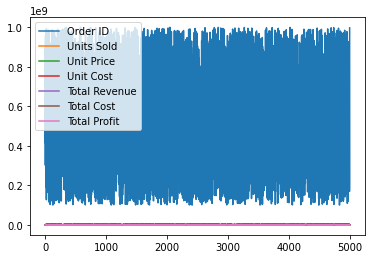

In [27]:
#Se carga el archivo usando todos los valores por defecto, exepto Total Profit
SaleRecord_DF=pd.read_csv("5000 Sales Records.csv")
#Tratemos de simplemente graficar, notaremos que es algo incomprensibele (debido a la cantidad de datos)
SaleRecord_DF.plot()

<AxesSubplot:xlabel='Unit Price', ylabel='Unit Cost'>

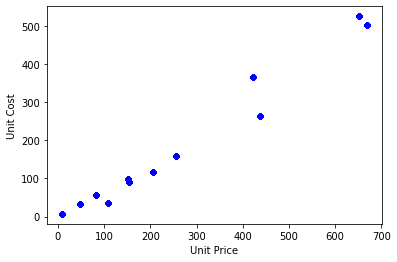

In [28]:
#Intetemos algo más elaborado, usando 'kind' se le dice de que tipo de grafico vamos a dibujar
# con 'x' e 'y' se le dice que datos toma.
SaleRecord_DF.plot(kind='scatter',x='Unit Price',y='Unit Cost',color='blue')

<AxesSubplot:xlabel='Order Date'>

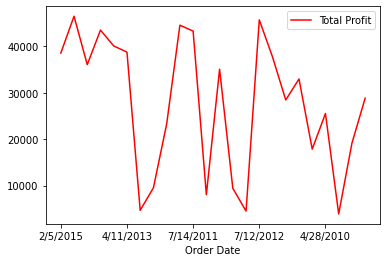

In [29]:
# Usando filtros
SaleRecord_DF.query('`Sales Channel` == "Offline" & `Total Profit` < 50000 & `Item Type` == "Snacks"').plot(kind='line',x='Order Date',y='Total Profit',color='red')

<AxesSubplot:xlabel='Order Date'>

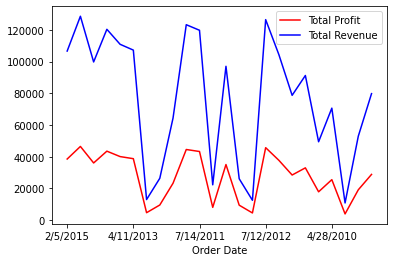

In [30]:
#Con múltiples gráficas
SaleRecord_DF.query('`Sales Channel` == "Offline" & `Total Profit` < 50000 & `Item Type` == "Snacks"').plot(kind='line',x='Order Date',y=['Total Profit','Total Revenue'],color=['red','blue'])

In [31]:
#Borrando
del(SaleRecord_DF)